#  Question 1 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
from time import time

In this question, we revisit our exploration of a ball in orbit around a rod from PS6. This time however, instead of employing the standard RK4 method to solve the ODE, we will instead use an adaptive step-size method. We begin by copying the equation of motion functions and original RK4 function:

\begin{align}
\frac{\mathrm{d} x}{\mathrm{d} t}&=v_{x} & \frac{\mathrm{d} v_{x}}{\mathrm{d} t}&=-GM\frac{x}{r^2\sqrt{r^2+L^2/4}}, \\
\frac{\mathrm{d} y}{\mathrm{d} t}&=v_{y} & \frac{\mathrm{d} v_{y}}{\mathrm{d} t}&=-GM\frac{y}{r^2\sqrt{r^2+L^2/4}},
\end{align}
where $t$ is the time, and we define $r=\sqrt{x^{2}+y^{2}}$. The initial conditions are $(x,y)=(1,0)$ and $(v_x,v_y)=(0,1)$ We assume $G=1$, $M=10$, $L=2$.

In [2]:
# SET CONSTANTS
G=1  #Newton's gravitational constant with unit 1
M=10 #Mass of rod
L=2 #length of rod

In [3]:
# DEFINE FUNCTION TO CALCULATE EQUATIONS OF MOTION
def f(r):
    ''' Function to perform calculations of defined EOM
    INPUT: 4-d position & velocity vector
    OUTPUT: four first order equation calulations at point'''
    #assign the  values
    x=r[0] #position in x
    y=r[1] #position in y
    vx=r[2] #velocity in x direction
    vy=r[3] #velocity in y direction
	# r is the distance from origin to ball bearing
    r = np.sqrt(x**2+y**2)
    #Use four first-order equations 
    fx = vx
    fy = vy
    fvx = - G*M/((r**2)*np.sqrt(r**2 + (L**2)/4))* x
    fvy = - G*M/((r**2)*np.sqrt(r**2 + (L**2)/4))* y
	# output array of x,y positions and x,y velocities
    return np.array([fx,fy,fvx,fvy],float)

In [4]:
# STANDARD 4-D RUNGE-KUTTA METHOD (FROM PS6)
def StandardRK4(input_r, start, stop, h):
    ''' USING STANDARD 4-D RUNGE-KUTTA METHOD
    INPUT: time array, 4-d input vector (4-d vector array
           with positions and velocites)
    OUTPUT: 4xlen(tpoints) list (pos & vels at each step)'''
    r = np.copy(input_r) # copy input array
    tpoints=np.arange(start,stop,h) # create time array
    output_r = [[],[],[],[]] # initialize 4-d output list
    for t in tpoints:  #loop the time
    # append calculated x,y,vx,vy values for each time
        output_r[0].append(r[0]) 
        output_r[1].append(r[1])
        output_r[2].append(r[2])
        output_r[3].append(r[3])
    # Formula for RK4 - taken from textbook (Newman pg 345)
    # Note: Here our function has no explicit dependance on t
    # therefore we ignored it in the definition of our function
        k1 = h*f(r)
        k2 = h*f(r+0.5*k1)
        k3 = h*f(r+0.5*k2)
        k4 = h*f(r+k3)
        r += (k1+2*k2+2*k3+k4)/6
    return output_r 

# Part A

Now we will modify our function $\texttt{StandardRK4}$ to emply adaptive time stepping. Following the textbook, we will use the following pseuocode:

1. Set initial h and target accuracy

2. Initialize lists to store times, positions, and velocities

3. Loop while time is less than end time

    1. Do two RK4 steps of size h, save as r1 and r11
    
    2. Do one RK4 step of size 2h, sabe as r2
    
    3. Calculate $x$ and $y$ errors according to $\epsilon_r = 1/30(r_1-r_2)$
    
    4. Caluclate total error according to $\epsilon = \sqrt{\epsilon_x^2 + \epsilon_y^2}$
    
    5. Calculate $ \rho = h \delta / \epsilon $
    
        1. If $\rho \geq 1$ : keep results for $x+h$, set $h'= h \rho^1/4$ BUT increase by maximum $h'= 2h$. Increment time, and move forward in loop.
        
        2. If $\rho < 1$ : set $h'= h rho^0.25$, repeat step. Do not increment time.

In [5]:
# DEFINE NEW ADAPTIVE RK4 METHOD
def AdaptiveRK4(input_r, start, end, step, accuracy):
    ''' USING ADAPTIVE STEP 4-D RUNGE-KUTTA METHOD
    INPUT: initial pos & vel (4d array), start time, end time,
           initial step size, target accuracy
    OUTPUT: 4xlen(tpoints) list (pos & vels at each step),
            tpoints (list of time steps)'''
    r = np.copy(input_r) # copy input array
    output_r = [[],[],[],[]] # initialize 4-d output list
    h = step # set variable for step sizes
    t = start # set variable for time
    tpoints = [] # initialize list to store time steps
    
    while t < end: # loop while time is less than end time
        # append calculated x,y,vx,vy values for each time
        output_r[0].append(r[0]) 
        output_r[1].append(r[1])
        output_r[2].append(r[2])
        output_r[3].append(r[3])
        tpoints.append(t) # append time
    
        accurate = False # set loop flag to append only if accurate
        while accurate == False:
        # Formula for an adaptive RK4 - (no t dependence)
            # first step of size h, save as r1
            k1 = h*f(r)
            k2 = h*f(r+0.5*k1)
            k3 = h*f(r+0.5*k2)
            k4 = h*f(r+k3)
            r1 = r + (k1+2*k2+2*k3+k4)/6
            # second step of size h, save as r11
            k1 = h*f(r1)
            k2 = h*f(r1+0.5*k1)
            k3 = h*f(r1+0.5*k2)
            k4 = h*f(r1+k3)
            r11 = r1 + (k1+2*k2+2*k3+k4)/6
            # do step of size 2h, save as r2
            k1 = 2*h*f(r)
            k2 = 2*h*f(r+0.5*k1)
            k3 = 2*h*f(r+0.5*k2)
            k4 = 2*h*f(r+k3)
            r2 = r + (k1+2*k2+2*k3+k4)/6
            # calculate x and y errors according to formula
            error_x = 1/30 * (r11[0]-r2[0])
            error_y = 1/30 * (r11[1]-r2[1])
            # caluclate total error
            error = np.sqrt(error_x**2 + error_y**2)
            # calculate ratio of actual to desired accuracy
            rho = h*accuracy/error
            if rho >= 1.: # if accurate
                accurate = True # end while loop
                r = np.copy(r1) # save first r1 caluclation to append
                t = t+h # increment time
                a = h*rho**0.25 # calculate new h
                if a < 2*h: h = a # ensure new h is not too big
                else: h = 2*h
            else: # if not accurate
                accurate = False # continue while loop (caluclate again)
                h = h*rho**0.25 # set new h
    return output_r, np.array(tpoints) # output pos, vels, and times

Let's compare the two methods now. We will use the following initial conditions:

In [6]:
# SET INITIAL CONDITIONS
a=0.0 #set the start time
b=10. #set the end time
N=1000 #set number of points (for standard RK4)
h=(b-a)/N #set the width between each points (for standard RK4)

#create array 'r' with initial condition x=1 y=0 vx=0 vy=1
r=np.array([1.0,0.0,0.0,1],float)

# do standard RK4
stdRK4 = StandardRK4(r, a, b, h)
# do adaptive RK4 with h_initial = 0.01, desired accuracy = 1E-6
atvRK4, tpoints2 = AdaptiveRK4(r, a, b, 0.01, 10**(-6))

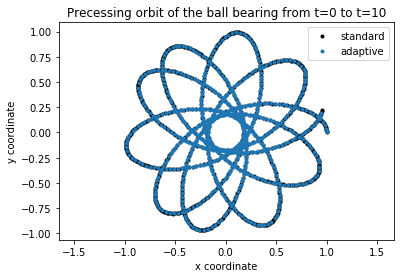

In [7]:
#plot the results ontop of each other as required
plt.plot(stdRK4[0],stdRK4[1], 'k.', label='standard')
plt.plot(atvRK4[0],atvRK4[1], '.', label='adaptive')
plt.axis('equal') #Set equal scaling 
plt.title("Precessing orbit of the ball bearing from t=0 to t=10")
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")
plt.legend()
plt.show()

The result is a little bit hard to see because of the high density of points. Against the lab manual's wishes, below we plot the two again side by side.

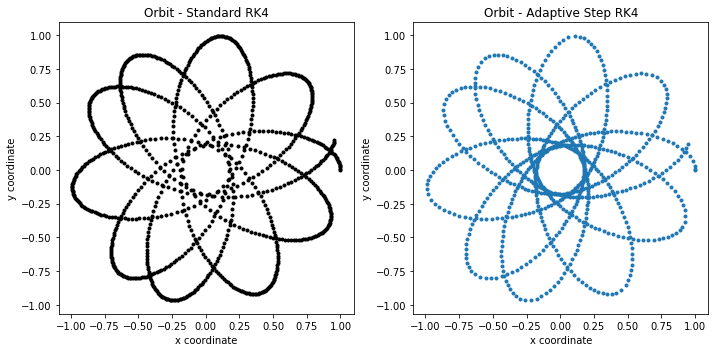

In [8]:
#plot the results beside each other
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(stdRK4[0],stdRK4[1], 'k.', label='standard')
ax1.axis('equal') #Set equal scaling 
ax1.set_title('Orbit - Standard RK4')
ax1.set_ylabel('y coordinate')
ax1.set_xlabel('x coordinate')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(atvRK4[0],atvRK4[1], '.', label='adaptive')
ax2.axis('equal') #Set equal scaling 
plt.title('Orbit - Adaptive Step RK4')
plt.xlabel("x coordinate")
plt.ylabel("y coordinate")

plt.tight_layout()
plt.show()

Wonderful. This makes answering the question A LOT easier. We can see the wasted computation done by the Standard RK4 method in areas of large radius where the velocity is low, and hence the step size does not need to be large. The Standard method also has too small a step size at small radii where velocity is high. This can lead to accuracy issues. We can see this by the large spacing between points near the centre. The adaptive stepping method on the other hand is the complete oposite. It uses large steps for high radii, and small steps for smaller radii, resulting in a much more accurate trajectory.

# Part B

Now we will compare the clock times between the two methods.

In [9]:
# STANDARD with h = 0.001
start1 = time()
stdRK4 = StandardRK4(r, a, b, 0.001)
end1 = time()

# STANDARD with h = 0.01
start2 = time()
stdRK4 = StandardRK4(r, a, b, 0.01)
end2 = time()

# ADAPTIVE with accuracy=1E-6, initial h=0.01
start3 = time()
atvRK4, tpointsatv = AdaptiveRK4(r, a, b, 0.01, 10**(-6))
end3 = time()

print('Time to run Standard RK4 h=0.001: ', end1-start1)
print('    Steps used: N =', int((b-a)/0.001))
print('Time to run Standard RK4 h=0.01: ', end2-start2)
print('    Steps used: N =', int((b-a)/0.01))
print('Time to run Adaptive RK4 acc=1E-6: ', end3-start3)
print('    Steps used: N =', len(tpointsatv))

Time to run Standard RK4 h=0.001:  0.7310106754302979
    Steps used: N = 10000
Time to run Standard RK4 h=0.01:  0.07097434997558594
    Steps used: N = 1000
Time to run Adaptive RK4 acc=1E-6:  0.28995203971862793
    Steps used: N = 821


We find that to achieve a similar number of steps (order 1000), the adaptive method is much slower than the standard method. This is because of all the additional calculations (calculating 3 different steps to compute 1). However, when we want to ensure a minimum accuracy between steps for the standard method, we end up wasting a lot of computational time in computing small steps for low velocities (outside of orbit). This quick calculation with N=1000 using the Standard Rk4 however is much less accurate however than the Adaptive method, which uses the same total number of steps but takes much longer to compute. When we increase the number of steps on the Standard method to ensure accuracy, we also waste computational time in stepping though slow-changing areas. We find therefore that the Stardard Method has the advantage in finding quick solutions, but if we want to ensure a high accuracy while not compromising computation time in slow-changing areas, the Adaptive Method becomes more advantageous.

# Part C

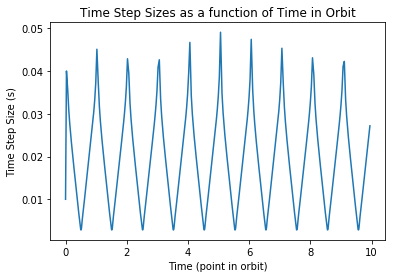

In [10]:
# Calcualte differences between time steps (dt = t[i] - t[i-1])
dtpoints = np.array(tpointsatv[1:]) - np.array(tpointsatv[:-1])
plt.plot(tpointsatv[:-1], dtpoints)
plt.title("Time Step Sizes as a function of Time in Orbit")
plt.xlabel("Time (point in orbit)")
plt.ylabel("Time Step Size (s)")
plt.show()

This graph shows us the variations in step sizes, from where the sizes are not required to be small to where they are reduced, but it isn't too informative about **where** exactly the small and large step sizes correspond to along the orbit. To demosntrate this, I will now plot the same graph but overlay a (normalized) plot of the speed of the ball. This will give us information about the orbit for each time.

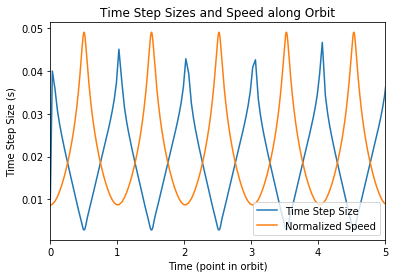

In [11]:
# calculate speed to plot against dtpoints (spd = sqrt(vx^2 + vy^2))
spd = np.sqrt(np.array(atvRK4[2][:-1])**2 + np.array(atvRK4[3][:-1])**2)
norm = max(dtpoints)/max(spd) # normalization factor

plt.plot(tpoints2[:-1], dtpoints, label='Time Step Size')
plt.plot(tpoints2[:-1], spd*norm, label='Normalized Speed')
plt.title("Time Step Sizes and Speed along Orbit")
plt.xlabel("Time (point in orbit)")
plt.ylabel("Time Step Size (s)")
plt.xlim(0,5) # makes things easier to see
plt.legend(loc='lower right')
plt.show()

This graph clearly shows us that the small step sizes occur when the speed is large (ball is travelling very fast - near radius=0), and the large step sizes are for when the speed is small (ball is travelling slowly - large radius). This makes sense as when integrating forward in time, if the velocity is large, the function is changing very quickly at that point. Therefore it would make sense to treat that area with more care and consider smaller time steps. Conversely, when the velocity is low, the function changes very little, and so a larger time step is sufficient to achieve a similar overall accuracy.